# Week 9 Practice

## Greeks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si

### Option Value

In [2]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [3]:
euro_option_bs(100, 100, 1, 0.05, 0.25, 'call')

12.335998930368717

In [4]:
euro_option_bs(100, 100, 1, 0.05, 0.25, 'put')

7.458941380440123

In [5]:
S = np.linspace(50,150,11)
Call = np.zeros((len(S),1))
Put = np.zeros((len(S),1))
for i in range(len(S)):
    Call [i] = euro_option_bs(S[i], 100, 1, 0.05, 0.25, 'call')
    Put [i] = euro_option_bs(S[i], 100, 1, 0.05, 0.25, 'put')

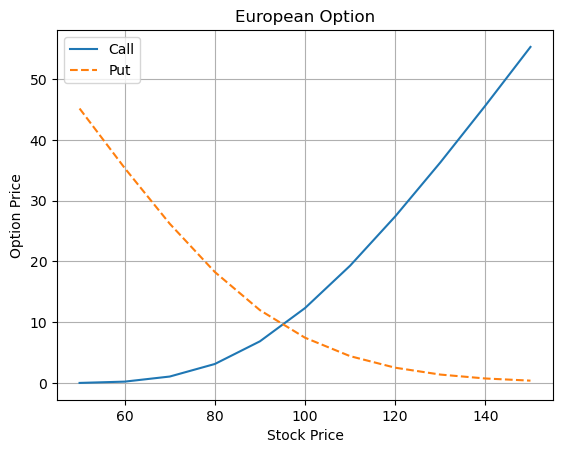

In [6]:
fig = plt.figure()
plt.plot(S, Call, '-')
plt.plot(S, Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('European Option')
plt.legend(['Call','Put'])

### Delta

Delta, ∆, measures the rate of change of the theoretical option value with respect to changes in the underlying asset's price. Delta is the first derivative of the value V of the option with respect to the underlying instrument's price S.

In [7]:
def delta(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  si.norm.cdf(d1, 0.0, 1.0)-1
    
    return delta

In [8]:
delta(100, 100, 1, 0.05, 0.25, 'call')

0.627409464153284

In [9]:
delta(100, 100, 1, 0.05, 0.25, 'put')

-0.372590535846716

In [10]:
S = np.linspace(50,150,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 100, 1, 0.05, 0.25, 'call')
    Delta_Put [i] = delta(S[i], 100, 1, 0.05, 0.25, 'put')

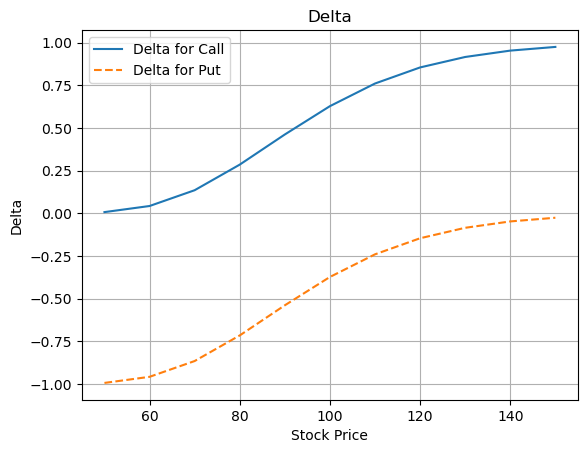

In [11]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

### Gamma

Gamma, Γ, measures the rate of change in the delta with respect to changes in the underlying price. Gamma is the second derivative of the value function with respect to the underlying price.

In [31]:
def gamma(S, K, T, r,  vol, payoff):
    
    d1 = (np.log(S / K) + (r  + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))

    gamma = si.norm.pdf(d1, 0.0, 1.0) / (vol *  np.sqrt(T) * S)

    
    return gamma

In [32]:
gamma(100, 100, 1, 0.05, 0.25, 'call')

0.015136793277352779

In [33]:
gamma(100, 100, 1, 0.05, 0.25, 'put')

0.015136793277352779

In [15]:
S = np.linspace(50,150,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 100, 1, 0.05, 0.25, 'call')

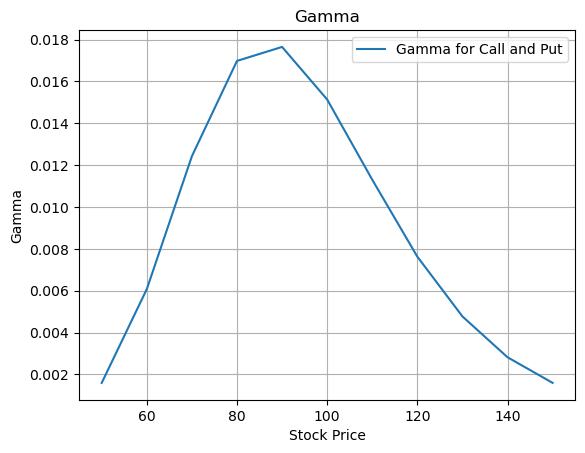

In [16]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

### Theta

Theta, 𝜃, measures the sensitivity of the value of the derivative to the passage of time (see Option time value): the "time decay".

In [17]:
def theta(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    N_d1_prime=1/np.sqrt(2 * np.pi) * np.exp(-d1**2/2)
    
    if payoff == "call":
        theta = - S * N_d1_prime * vol / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = - S * N_d1_prime * vol / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [18]:
theta(100, 100, 1, 0.05, 0.25, 'call')

-7.250495273420727

In [19]:
theta(100, 100, 1, 0.05, 0.25, 'put')

-2.4943481509171566

In [20]:
T = np.linspace(0.25,3,12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(100, 100, T[i], 0.05, 0.25, 'call')
    Theta_Put [i] = theta(100, 100, T[i], 0.05, 0.25, 'put')

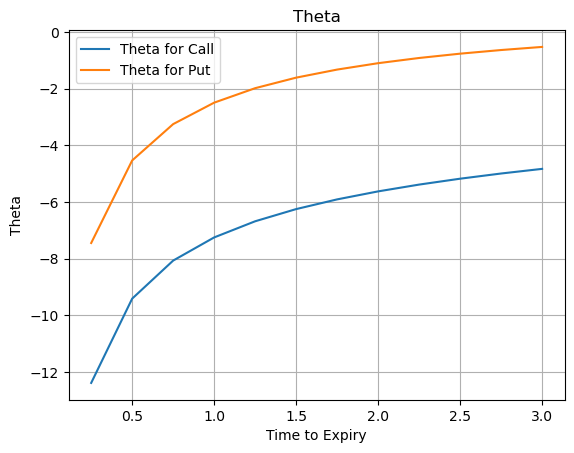

In [21]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call', 'Theta for Put'])

### Rho

Rho, 𝜌, measures sensitivity to the interest rate: it is the derivative of the option value with respect to the risk free interest rate (for the relevant outstanding term).

In [34]:
def rho(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [35]:
rho(100, 100, 1, 0.05, 0.25, 'call')

50.404947484959685

In [36]:
rho(100, 100, 1, 0.05, 0.25, 'put')

-44.71799496511172

In [37]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(100, 100, 1, r[i], 0.25, 'call')
    Rho_Put [i] = rho(100, 100, 1, r[i], 0.25, 'put')

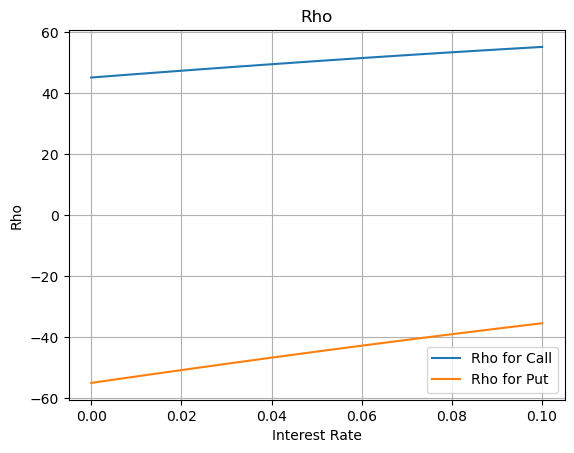

In [38]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', 'Rho for Put'])

### Vega

Vega measures sensitivity to volatility. Vega is the derivative of the option value with respect to the volatility of the underlying asset.

In [39]:
def vega(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    N_d1_prime=1/np.sqrt(2 * np.pi) * np.exp(-d1**2/2)
    vega = S * np.sqrt(T) * N_d1_prime
    
    return vega

In [40]:
vega(100, 100, 1, 0.05, 0.25, 'call')

37.84198319338194

In [41]:
vega(100, 100, 1, 0.05, 0.25, 'put')

37.84198319338194

In [42]:
vol = np.linspace(0.1,0.4,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(100, 100, 1, 0.05, vol[i], 'call')

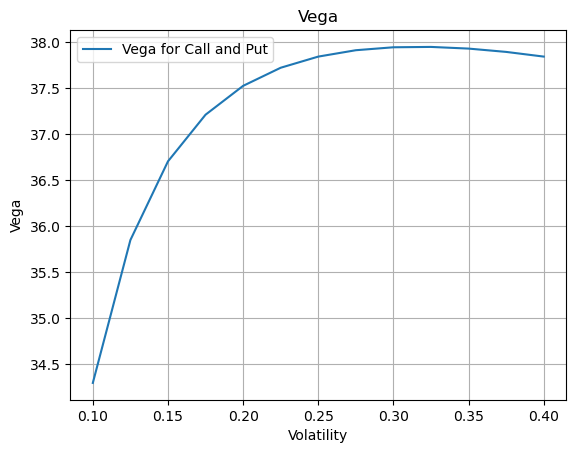

In [43]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call and Put'])